In [ ]:
# Video Game Sales and Engagement Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

games_df = pd.read_csv("/content/drive/MyDrive/games.csv")
vgsales_df = pd.read_csv("/content/drive/MyDrive/vgsales.csv")


print("Games.csv Columns:", games_df.columns)
print("vgsales.csv Columns:", vgsales_df.columns)




Games.csv Columns: Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')
vgsales.csv Columns: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [ ]:

games_df.drop_duplicates(inplace=True)
games_df.dropna(subset=['Rating', 'Plays', 'Wishlist'], inplace=True)
games_df['Genres'] = games_df['Genres'].str.title().str.strip()
games_df['Release Date'] = pd.to_datetime(games_df['Release Date'], errors='coerce')
games_df['Year'] = games_df['Release Date'].dt.year

vgsales_df.drop_duplicates(inplace=True)
vgsales_df.dropna(subset=['Global_Sales'], inplace=True)
vgsales_df['Genre'] = vgsales_df['Genre'].str.title().str.strip()
vgsales_df['Platform'] = vgsales_df['Platform'].str.upper().str.strip()
vgsales_df['Publisher'] = vgsales_df['Publisher'].str.title().str.strip()


games_df.head(), vgsales_df.head()


(   Unnamed: 0                                    Title Release Date  \
 0           0                               Elden Ring   2022-02-25   
 1           1                                    Hades   2019-12-10   
 2           2  The Legend of Zelda: Breath of the Wild   2017-03-03   
 3           3                                Undertale   2015-09-15   
 4           4                            Hollow Knight   2017-02-24   
 
                                                 Team  Rating Times Listed  \
 0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
 1                               ['Supergiant Games']     4.3         2.9K   
 2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
 3                                 ['tobyfox', '8-4']     4.2         3.5K   
 4                                    ['Team Cherry']     4.4           3K   
 
   Number of Reviews                                             Genres  \
 0              3.9K 

In [ ]:
# 1.Top-rated games by user reviews
top_rated_games = games_df[['Title', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
print("🌟 Top Rated Games by User Reviews:")
print(top_rated_games)


🌟 Top Rated Games by User Reviews:
                                  Title  Rating
1252  Elden Ring: Shadow of the Erdtree     4.8
28         Disco Elysium: The Final Cut     4.6
1035        Bloodborne: The Old Hunters     4.6
539        Umineko: When They Cry Chiru     4.6
369                         Outer Wilds     4.6
354        Disco Elysium: The Final Cut     4.6
43                          Outer Wilds     4.6
717       Hitman World of Assassination     4.6
297         Bloodborne: The Old Hunters     4.6
804        Disco Elysium: The Final Cut     4.6


In [ ]:
# 2.Highest average rating by developer/team
top_devs_avg_rating = games_df.groupby('Team')['Rating'].mean().sort_values(ascending=False).head(10)
print("🧑‍🤝‍🧑 Developers with Highest Average Ratings:")
print(top_devs_avg_rating)


🧑‍🤝‍🧑 Developers with Highest Average Ratings:
Team
['Valve']                                          4.600
['Sony Computer Entertainment', 'Fromsoftware']    4.600
['Konami Digital Entertainment']                   4.600
['07Th Expansion']                                 4.600
['Bay 12 Games', 'Kitfox Games']                   4.600
['Activision', 'Fromsoftware']                     4.600
['Za/Um']                                          4.600
['Inlusio Interactive', 'Io Interactive']          4.600
['Mobius Digital', 'Annapurna Interactive']        4.575
['Fromsoftware', 'Sony Computer Entertainment']    4.540
Name: Rating, dtype: float64


In [ ]:
# 3.Split multiple genres and count
genres_split = games_df['Genres'].dropna().str.split(',')
genres_exploded = genres_split.explode().str.strip()
genre_counts = genres_exploded.value_counts().head(10)

print("🧩 Most Common Genres:")
print(genre_counts)


🧩 Most Common Genres:
Genres
['Adventure'              964
'Rpg']                    247
'Shooter']                233
'Indie'                   192
'Rpg'                     177
'Platform']               168
'Platform'                114
'Turn Based Strategy']     99
'Strategy']                89
'Puzzle']                  84
Name: count, dtype: int64


In [ ]:
# 4.Calculate backlog-to-wishlist ratio

games_df['Backlogs'] = pd.to_numeric(games_df['Backlogs'], errors='coerce')
games_df['Wishlist'] = pd.to_numeric(games_df['Wishlist'], errors='coerce')


games_df['Backlog_Wishlist_Ratio'] = games_df['Backlogs'] / games_df['Wishlist']

top_backlog_ratio = games_df[['Title', 'Backlogs', 'Wishlist', 'Backlog_Wishlist_Ratio']]\
    .sort_values(by='Backlog_Wishlist_Ratio', ascending=False).head(10)

print("⏳ Games with Highest Backlog-to-Wishlist Ratio:")
print(top_backlog_ratio)


⏳ Games with Highest Backlog-to-Wishlist Ratio:
                          Title  Backlogs  Wishlist  Backlog_Wishlist_Ratio
661                    Paladins     188.0      16.0               11.750000
1289                    Figment     392.0      35.0               11.200000
842                    Fortnite     470.0      47.0               10.000000
959                  Pokémon Go     197.0      22.0                8.954545
727   Half-Life: Opposing Force     838.0      95.0                8.821053
1023                  Destiny 2     845.0     103.0                8.203883
1053                 Brawlhalla     294.0      36.0                8.166667
1201        PUBG: Battlegrounds     253.0      32.0                7.906250
1372            Killing Floor 2     501.0      66.0                7.590909
1064                     Roblox     102.0      14.0                7.285714


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


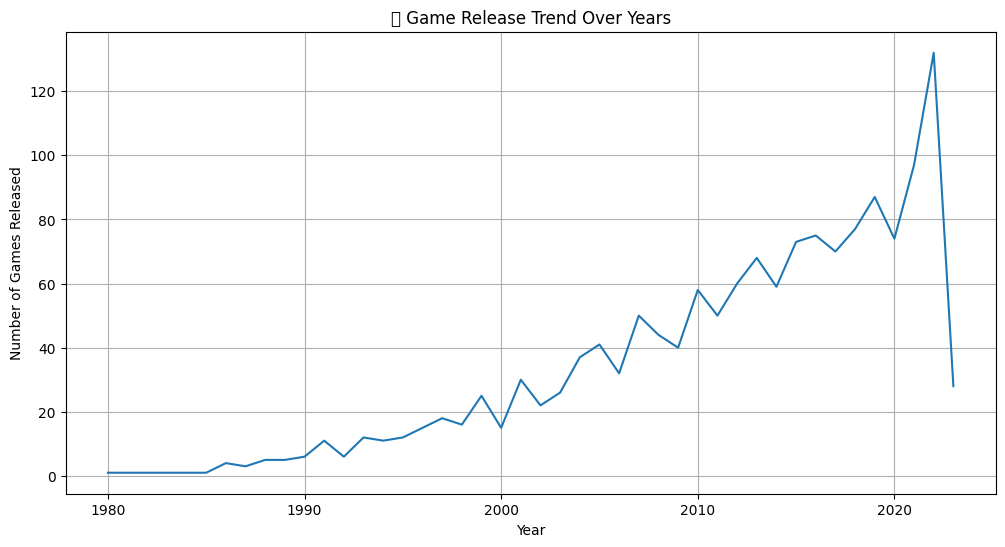

In [ ]:
# 5.Extract year from release date
games_df['Year'] = pd.to_datetime(games_df['Release Date'], errors='coerce').dt.year
release_trend = games_df['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x=release_trend.index, y=release_trend.values)
plt.title("🗓️ Game Release Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.grid(True)
plt.show()


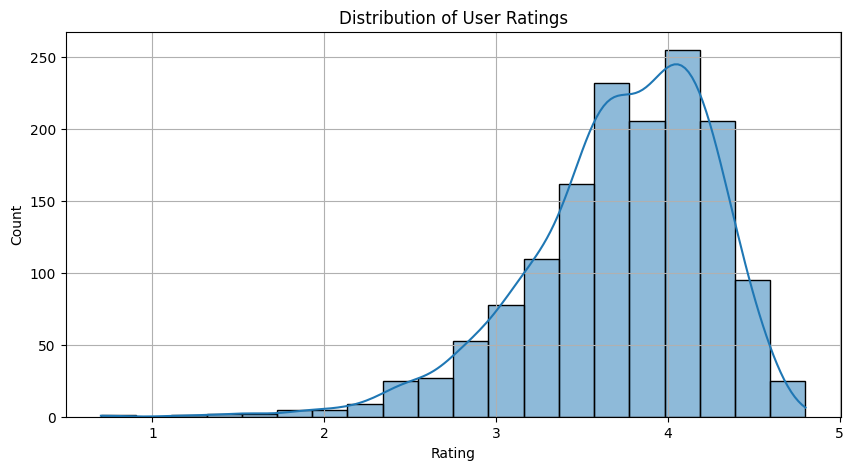

In [ ]:
#6.Distribution of User Ratings
plt.figure(figsize=(10,5))
sns.histplot(games_df['Rating'], bins=20, kde=True)
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
#7.Top 10 Most Wishlisted Games

top_wishlist = games_df[['Title', 'Wishlist']].sort_values(by='Wishlist', ascending=False).head(10)
print("Top 10 Most Wishlisted Games:")
print(top_wishlist)


Top 10 Most Wishlisted Games:
                                                  Title  Wishlist
951                                  Persona 3 Portable     995.0
121             Dark Souls II: Scholar of the First Sin     994.0
401             Dark Souls II: Scholar of the First Sin     994.0
867             Dark Souls II: Scholar of the First Sin     994.0
1087                      Persona 2: Eternal Punishment     993.0
938   Zero Escape: Nine Hours, Nine Persons, Nine Doors     991.0
173                                     Final Fantasy X     990.0
521                                          Rain World     987.0
502                     Crash Bandicoot N. Sane Trilogy     986.0
235                     Crash Bandicoot N. Sane Trilogy     986.0


In [ ]:
# 8.Explode genres and join with plays
def convert_plays_to_number(x):
    if isinstance(x, str):
        x = x.strip()
        if x.endswith('K'):
            return float(x[:-1]) * 1000
        elif x.endswith('M'):
            return float(x[:-1]) * 1_000_000
        else:
            try:
                return float(x)
            except ValueError:
                return None
    return x

# Apply conversion
genre_play_df['Plays'] = genre_play_df['Plays'].apply(convert_plays_to_number)

# Now you can group and compute mean safely
avg_plays_by_genre = genre_play_df.groupby('Genres')['Plays'].mean().sort_values(ascending=False).head(10)

print(" Average Plays per Genre:")
print(avg_plays_by_genre)


 Average Plays per Genre:
Genres
['Moba'          13000.000000
['Fighting'      11267.875000
['Platform'       9538.461538
'Brawler']        8619.317073
['Simulator']     8160.000000
'Platform']       8011.815476
['Shooter']       7985.791667
'Shooter']        7741.536481
'Sport']          7547.444444
'Racing'          7436.333333
Name: Plays, dtype: float64


In [ ]:
# 9.Number of games and average rating by developer
studio_stats = games_df.groupby('Team').agg({'Title': 'count', 'Rating': 'mean'})
studio_stats.columns = ['Game Count', 'Avg Rating']
top_studios = studio_stats.sort_values(by=['Game Count', 'Avg Rating'], ascending=[False, False]).head(10)

print(" Top Developer Studios by Productivity and Rating:")
print(top_studios)


 Top Developer Studios by Productivity and Rating:
                                               Game Count  Avg Rating
Team                                                                 
['Capcom']                                             35    3.722857
['Square Enix']                                        30    3.946667
['Nintendo', 'Nintendo Ead']                           19    3.842105
['Nintendo']                                           19    3.810526
['Nintendo', 'Game Freak']                             19    3.805263
['Nintendo Ead', 'Nintendo']                           16    3.887500
['Intelligent Systems Co., Ltd.', 'Nintendo']          14    3.550000
['Sega', 'Sonic Team']                                 11    2.754545
['Hal Laboratory', 'Nintendo']                         10    3.900000
['Ubisoft Montreal', 'Ubisoft Entertainment']          10    3.350000


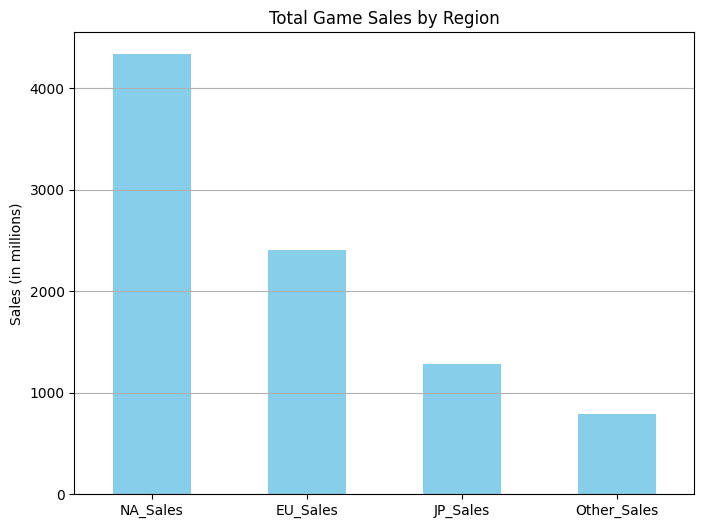

In [ ]:
#10. Which region generates the most game sales?

region_sales = vgsales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8,6))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Game Sales by Region")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

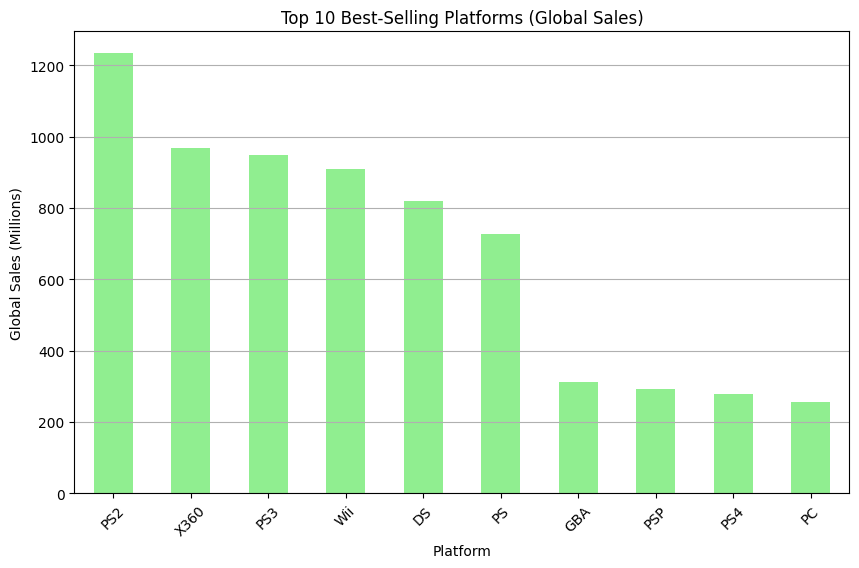

In [ ]:
#11.what are the best-selling platforms?
platform_sales = vgsales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
platform_sales.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Best-Selling Platforms (Global Sales)")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


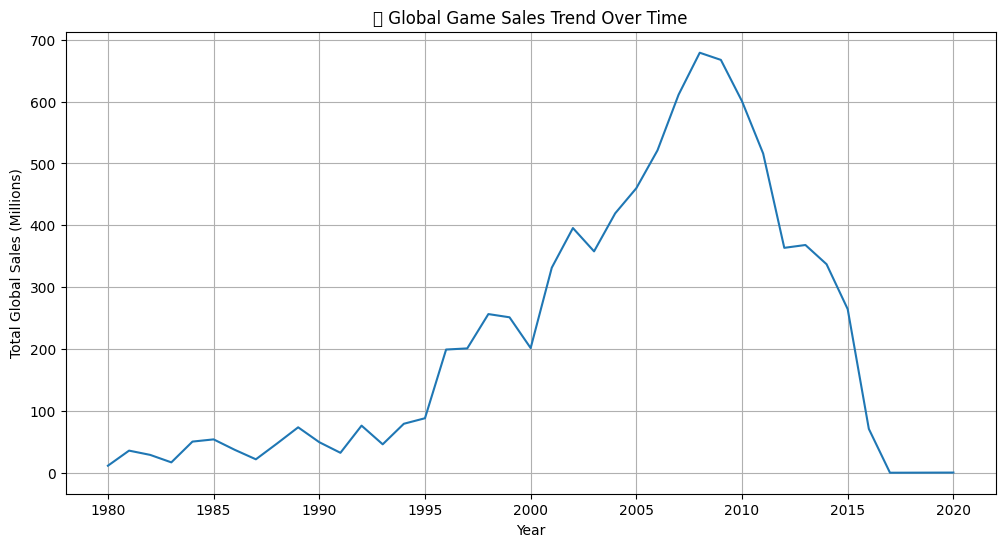

In [ ]:
# 12.What’s the trend of game releases and sales over years?

sales_trend = vgsales_df.groupby('Year')['Global_Sales'].sum().dropna().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=sales_trend.index.astype(int), y=sales_trend.values)
plt.title("📅 Global Game Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Global Sales (Millions)")
plt.grid(True)
plt.show()

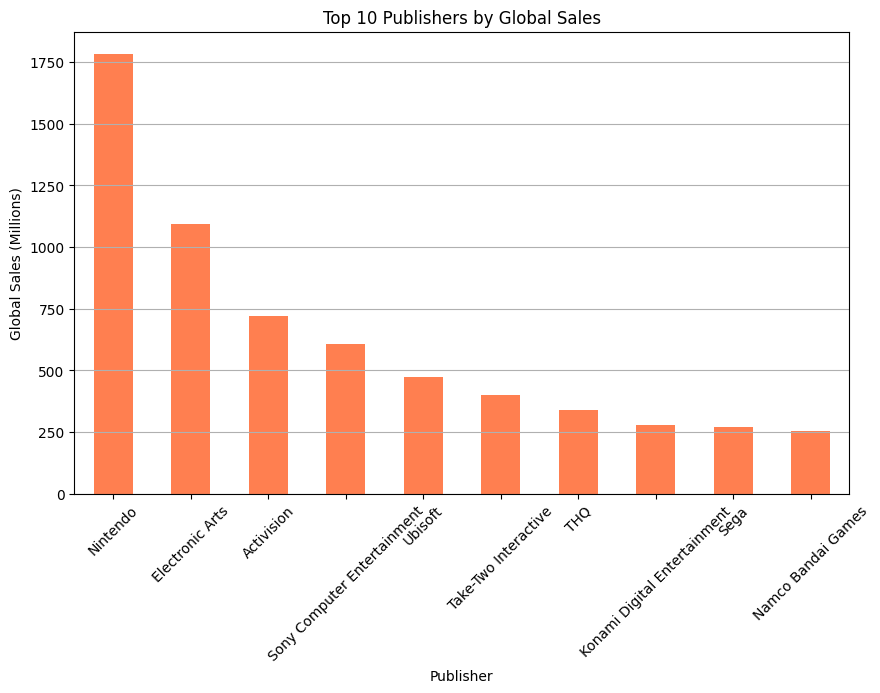

In [ ]:
#13.Who are the top publishers by sales?

top_publishers = vgsales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_publishers.plot(kind='bar', color='coral')
plt.title("Top 10 Publishers by Global Sales")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

<ipython-input-16-ff2e7f1233cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games, x='Global_Sales', y='Name', palette='viridis')


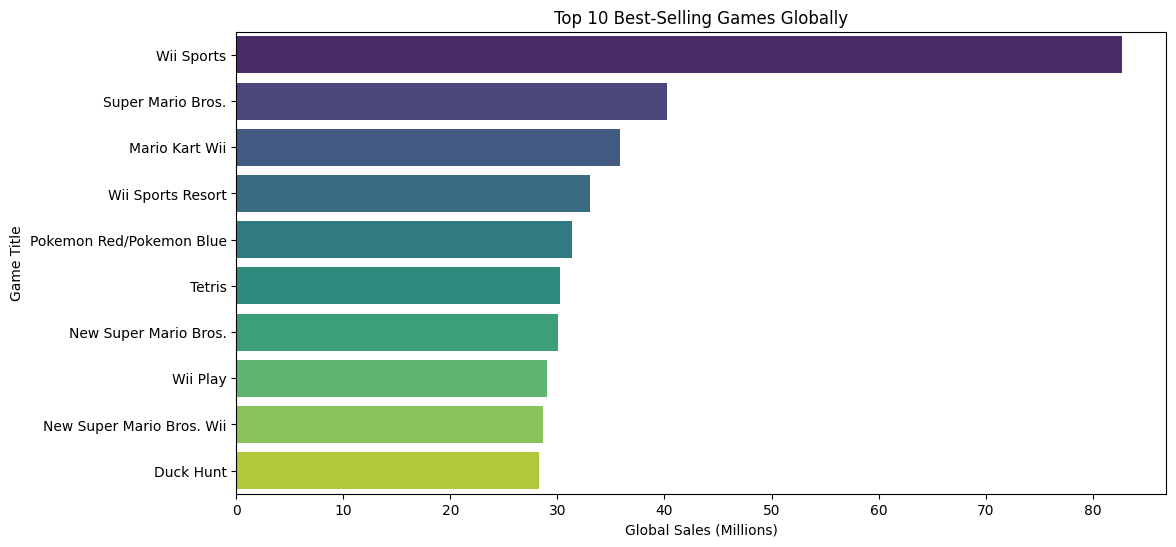

In [ ]:
#14. Which games are the top 10 best-sellers globally?

top_games = vgsales_df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_games, x='Global_Sales', y='Name', palette='viridis')
plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.show()

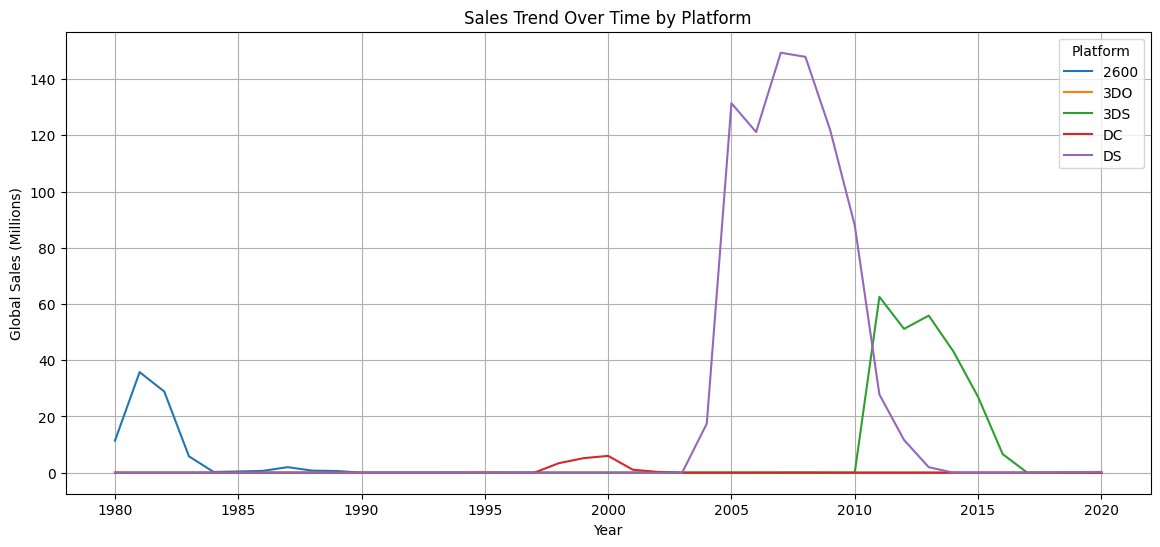

In [ ]:
#15.How has the market evolved by platform over time?

platform_year_sales = vgsales_df.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum').fillna(0)
platform_year_sales = platform_year_sales[platform_year_sales.columns[:5]]  # Show top 5 platforms only

platform_year_sales.plot(figsize=(14,6))
plt.title("Sales Trend Over Time by Platform")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.legend(title='Platform')
plt.show()


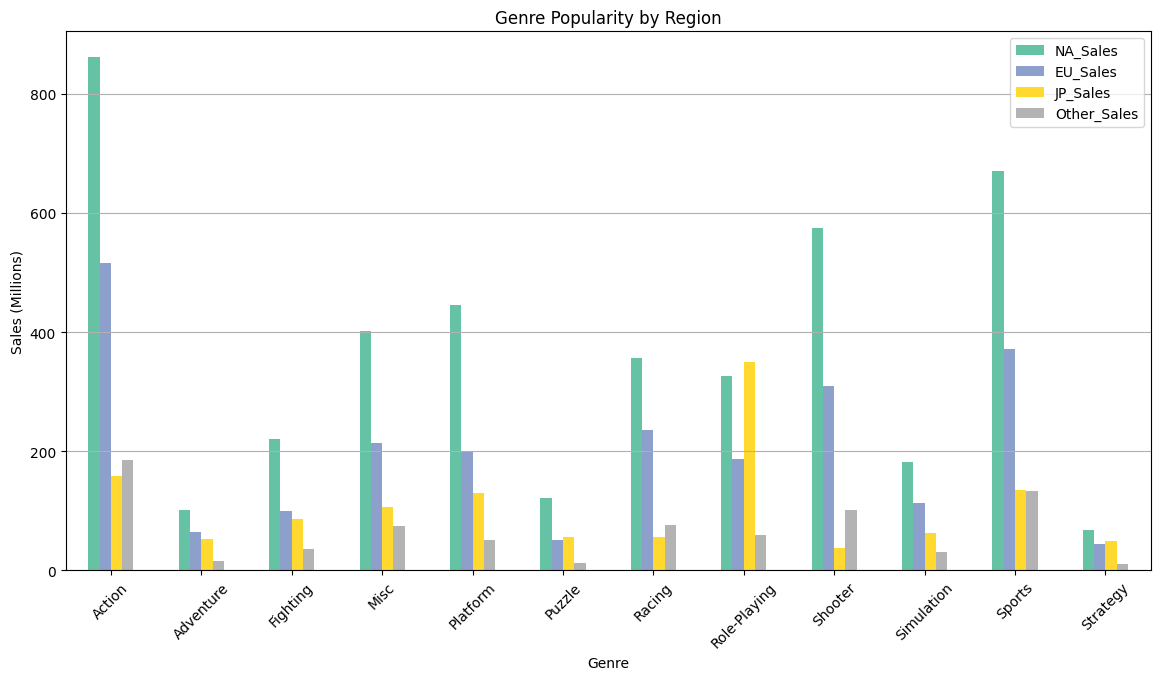

In [ ]:
#16.What are the regional genre preferences?

genre_region_sales = vgsales_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

genre_region_sales.plot(kind='bar', figsize=(14,7), colormap='Set2')
plt.title("Genre Popularity by Region")
plt.ylabel("Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

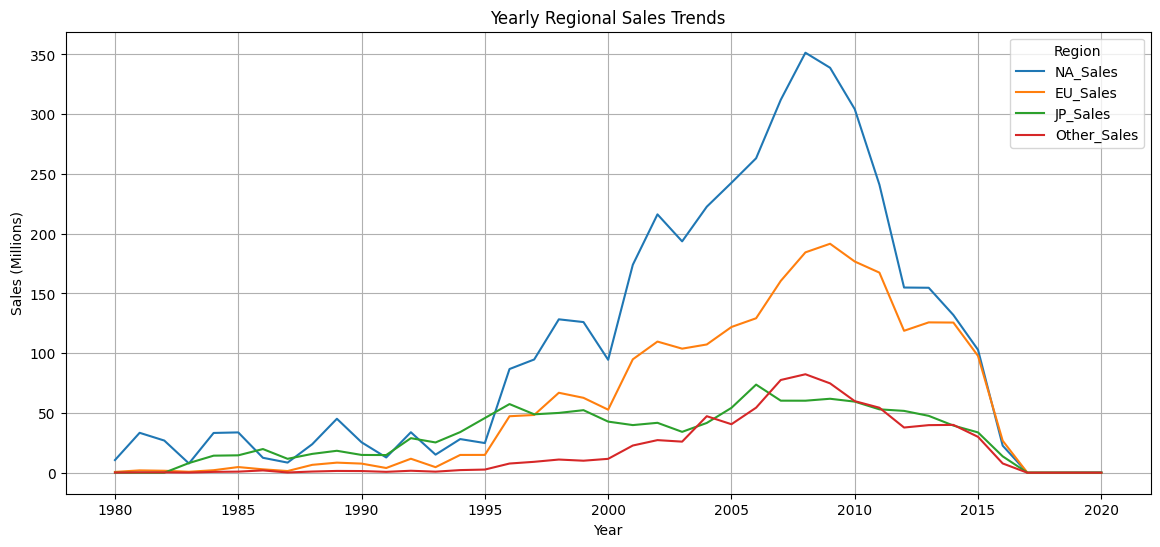

In [ ]:
#17.What’s the yearly sales change per region?

yearly_region_sales = vgsales_df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().dropna()

yearly_region_sales.plot(figsize=(14,6))
plt.title("Yearly Regional Sales Trends")
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")
plt.grid(True)
plt.legend(title='Region')
plt.show()


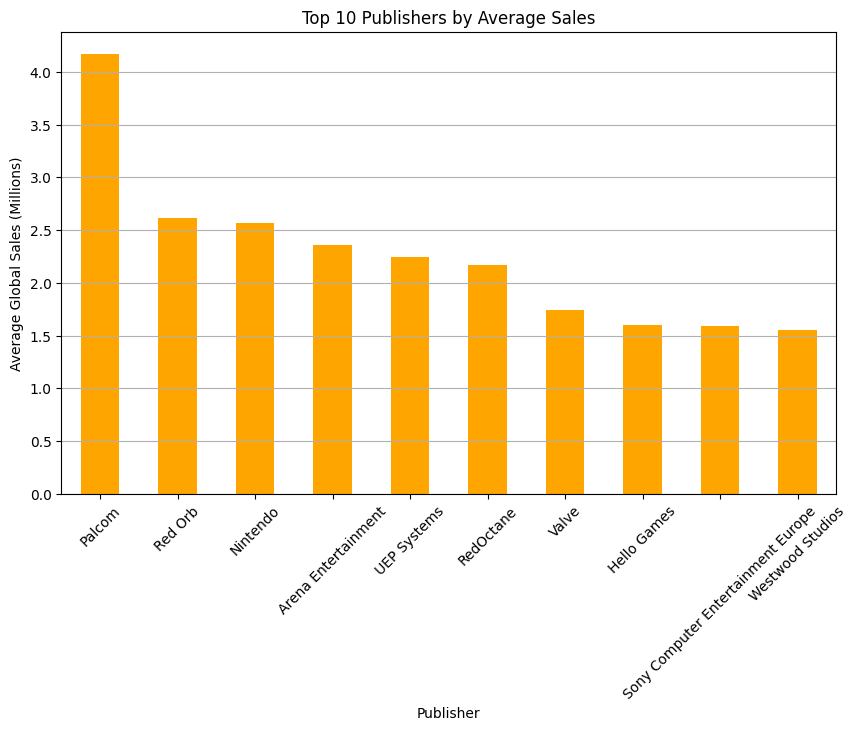

In [ ]:
#18.What is the average sales per publisher?

avg_sales_publisher = vgsales_df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_sales_publisher.plot(kind='bar', color='orange')
plt.title("Top 10 Publishers by Average Sales")
plt.ylabel("Average Global Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [ ]:
#19.What are the top 5 best-selling games per platform?

top_5_each_platform = vgsales_df.sort_values(['Platform', 'Global_Sales'], ascending=[True, False]).groupby('Platform').head(5)

for platform in top_5_each_platform['Platform'].unique():
    top_games = top_5_each_platform[top_5_each_platform['Platform'] == platform]
    print(f"\nTop 5 Games for Platform: {platform}")
    display(top_games[['Name', 'Global_Sales']])


Top 5 Games for Platform: 2600


,Name,Global_Sales
89,Pac-Man,7.81
239,Pitfall!,4.50
258,Asteroids,4.31
544,Missile Command,2.76
734,Frogger,2.20



Top 5 Games for Platform: 3DO


,Name,Global_Sales
12635,Policenauts,0.06
14996,Bust-A-Move,0.02
15479,Sotsugyou II: Neo Generation Special,0.02



Top 5 Games for Platform: 3DS


,Name,Global_Sales
32,Pokemon X/Pokemon Y,14.35
42,Mario Kart 7,12.21
49,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.33
53,Super Mario 3D Land,10.79
64,New Super Mario Bros. 2,9.82



Top 5 Games for Platform: DC


,Name,Global_Sales
637,Sonic Adventure,2.42
959,Crazy Taxi,1.81
1677,NFL 2K,1.20
1709,Shenmue,1.18
1793,Resident Evil - Code: Veronica,1.14



Top 5 Games for Platform: DS


,Name,Global_Sales
6,New Super Mario Bros.,30.01
10,Nintendogs,24.76
11,Mario Kart DS,23.42
19,Brain Age: Train Your Brain in Minutes a Day,20.22
20,Pokemon Diamond/Pokemon Pearl,18.36



Top 5 Games for Platform: GB


,Name,Global_Sales
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
12,Pokemon Gold/Pokemon Silver,23.10
21,Super Mario Land,18.14
30,Pokémon Yellow: Special Pikachu Edition,14.64



Top 5 Games for Platform: GBA


,Name,Global_Sales
25,Pokemon Ruby/Pokemon Sapphire,15.85
58,Pokemon FireRed/Pokemon LeafGreen,10.49
130,Pokémon Emerald Version,6.41
162,Super Mario Advance,5.49
163,Mario Kart: Super Circuit,5.47



Top 5 Games for Platform: GC


,Name,Global_Sales
107,Super Smash Bros. Melee,7.07
110,Mario Kart: Double Dash!!,6.95
135,Super Mario Sunshine,6.31
232,The Legend of Zelda: The Wind Waker,4.60
356,Luigi's Mansion,3.60



Top 5 Games for Platform: GEN


,Name,Global_Sales
143,Sonic the Hedgehog 2,6.03
254,Sonic the Hedgehog,4.34
564,Mortal Kombat,2.67
588,Streets of Rage,2.60
827,NBA Jam,2.05



Top 5 Games for Platform: GG


,Name,Global_Sales
13525,Sonic the Hedgehog 2 (8-bit),0.04



Top 5 Games for Platform: N64


,Name,Global_Sales
46,Super Mario 64,11.89
63,Mario Kart 64,9.87
84,GoldenEye 007,8.09
94,The Legend of Zelda: Ocarina of Time,7.60
157,Super Smash Bros.,5.55



Top 5 Games for Platform: NES


,Name,Global_Sales
1,Super Mario Bros.,40.24
9,Duck Hunt,28.31
22,Super Mario Bros. 3,17.28
96,Super Mario Bros. 2,7.46
127,The Legend of Zelda,6.51



Top 5 Games for Platform: NG


,Name,Global_Sales
6681,Samurai Shodown II,0.25
7045,The King of Fighters '95 (CD),0.23
7498,The King of Fighters '95,0.20
7553,Samurai Spirits (CD),0.20
9196,The King of Fighters '94 (CD),0.14



Top 5 Games for Platform: PC


,Name,Global_Sales
83,The Sims 3,8.11
137,World of Warcraft,6.28
181,Diablo III,5.20
194,Microsoft Flight Simulator,5.12
217,StarCraft II: Wings of Liberty,4.83



Top 5 Games for Platform: PCFX


,Name,Global_Sales
14556,Blue Breaker: Ken Yorimo Hohoemi o,0.03



Top 5 Games for Platform: PS


,Name,Global_Sales
52,Gran Turismo,10.95
66,Final Fantasy VII,9.72
69,Gran Turismo 2,9.49
87,Final Fantasy VIII,7.86
95,Crash Bandicoot 2: Cortex Strikes Back,7.58



Top 5 Games for Platform: PS2


,Name,Global_Sales
17,Grand Theft Auto: San Andreas,20.81
24,Grand Theft Auto: Vice City,16.15
28,Gran Turismo 3: A-Spec,14.98
38,Grand Theft Auto III,13.10
47,Gran Turismo 4,11.66



Top 5 Games for Platform: PS3


,Name,Global_Sales
16,Grand Theft Auto V,21.40
34,Call of Duty: Black Ops II,14.03
37,Call of Duty: Modern Warfare 3,13.46
40,Call of Duty: Black Ops,12.73
54,Gran Turismo 5,10.77



Top 5 Games for Platform: PS4


,Name,Global_Sales
33,Call of Duty: Black Ops 3,14.24
44,Grand Theft Auto V,11.98
77,FIFA 16,8.49
92,Star Wars Battlefront (2015),7.67
93,Call of Duty: Advanced Warfare,7.60



Top 5 Games for Platform: PSP


,Name,Global_Sales
90,Grand Theft Auto: Liberty City Stories,7.72
161,Monster Hunter Freedom Unite,5.50
198,Grand Theft Auto: Vice City Stories,5.08
214,Monster Hunter Freedom 3,4.87
266,Daxter,4.22



Top 5 Games for Platform: PSV


,Name,Global_Sales
713,Minecraft,2.25
1023,Uncharted: Golden Abyss,1.74
1071,Call of Duty Black Ops: Declassified,1.69
1286,Assassin's Creed III: Liberation,1.47
1296,LittleBigPlanet PS Vita,1.47



Top 5 Games for Platform: SAT


,Name,Global_Sales
888,Virtua Fighter 2,1.93
1753,Sega Rally Championship,1.16
1923,Virtua Fighter,1.07
3237,Virtua Cop,0.62
3274,Fighters MEGAMiX,0.62



Top 5 Games for Platform: SCD


,Name,Global_Sales
1261,Sonic CD,1.50
9014,Shining Force CD,0.14
11751,Formula One World Championship: Beyond the Limit,0.07
12570,Record of Lodoss War: Eiyuu Sensou,0.06
12971,Game no Kanzume Vol 2,0.05



Top 5 Games for Platform: SNES


,Name,Global_Sales
18,Super Mario World,20.61
57,Super Mario All-Stars,10.55
71,Donkey Kong Country,9.30
76,Super Mario Kart,8.76
136,Street Fighter II: The World Warrior,6.30



Top 5 Games for Platform: TG16


,Name,Global_Sales
9223,Doukyuusei,0.14
15535,Ginga Fukei Densetsu: Sapphire,0.02



Top 5 Games for Platform: WS


,Name,Global_Sales
3931,Final Fantasy,0.51
6133,Digimon Adventure: Anode Tamer,0.28
6669,Final Fantasy II,0.25
8050,Chocobo no Fushigi Dungeon for WonderSwan,0.18
8306,Super Robot Taisen Compact 2 Dai-1-Bu,0.17



Top 5 Games for Platform: Wii


,Name,Global_Sales
0,Wii Sports,82.74
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62



Top 5 Games for Platform: WiiU


,Name,Global_Sales
108,Mario Kart 8,6.96
183,New Super Mario Bros. U,5.19
203,Super Smash Bros. for Wii U and 3DS,5.02
235,Splatoon,4.57
246,Nintendo Land,4.44



Top 5 Games for Platform: X360


,Name,Global_Sales
15,Kinect Adventures!,21.82
23,Grand Theft Auto V,16.38
29,Call of Duty: Modern Warfare 3,14.76
31,Call of Duty: Black Ops,14.64
35,Call of Duty: Black Ops II,13.73



Top 5 Games for Platform: XB


,Name,Global_Sales
79,Halo 2,8.49
129,Halo: Combat Evolved,6.43
464,Tom Clancy's Splinter Cell,3.02
507,The Elder Scrolls III: Morrowind,2.86
568,Fable,2.66



Top 5 Games for Platform: XOne


,Name,Global_Sales
101,Call of Duty: Black Ops 3,7.30
193,Call of Duty: Advanced Warfare,5.13
197,Grand Theft Auto V,5.08
260,Halo 5: Guardians,4.26
287,Fallout 4,4.09


In [ ]:
import pandas as pd

# Load the CSV files
games_df = pd.read_csv('/content/drive/MyDrive/games.csv')
vgsales_df = pd.read_csv('/content/drive/MyDrive/vgsales.csv')

# Clean up columns for merging (make titles consistent)
games_df['Title'] = games_df['Title'].str.strip().str.lower()
vgsales_df['Name'] = vgsales_df['Name'].str.strip().str.lower()

# Merge on title/name
merged_df = pd.merge(games_df, vgsales_df, left_on='Title', right_on='Name', how='inner')

# Preview
merged_df.head()


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,...,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,5,minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,...,minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,5,minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,...,minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,5,minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,...,minecraft,PS4,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,5,minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,...,minecraft,XOne,2014.0,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,5,minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,...,minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


In [ ]:
#20.Which game genres generate the most global sales?

# Split multiple genres per game
genre_sales = merged_df.copy()
genre_sales = genre_sales.dropna(subset=['Genres', 'Global_Sales'])
genre_sales['Genres'] = genre_sales['Genres'].str.split(',')
genre_sales = genre_sales.explode('Genres')
genre_sales['Genres'] = genre_sales['Genres'].str.strip()

# Group by genre and sum sales
genre_sales_total = genre_sales.groupby('Genres')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Genres by Global Sales:")
display(genre_sales_total)

Top 10 Genres by Global Sales:


,Global_Sales
Genres,
['Adventure',1964.93
'Shooter'],667.26
'Platform'],604.95
'RPG'],390.00
['Shooter'],377.03
'Sport'],251.72
['Simulator',250.61
['Racing'],185.13
['Platform'],155.70


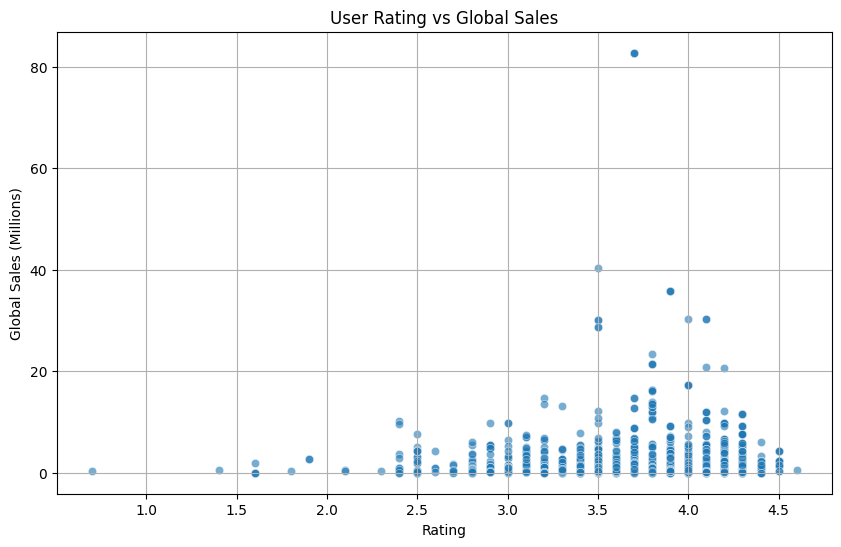

In [ ]:
#21. How does user rating affect global sales?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Rating', y='Global_Sales', alpha=0.6)
plt.title("User Rating vs Global Sales")
plt.xlabel("Rating")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.show()

In [ ]:
#22.Which platforms have the most games with high ratings (e.g., above 4)?

high_rated_games = merged_df[merged_df['Rating'] > 4]
platform_high_rated = high_rated_games['Platform'].value_counts().head(10)
print("Top Platforms with High-Rated Games:")
display(platform_high_rated)

Top Platforms with High-Rated Games:


,count
Platform,
PS3,41
PS2,37
PC,35
X360,30
PS4,22
PS,21
DS,21
SNES,19
GC,16


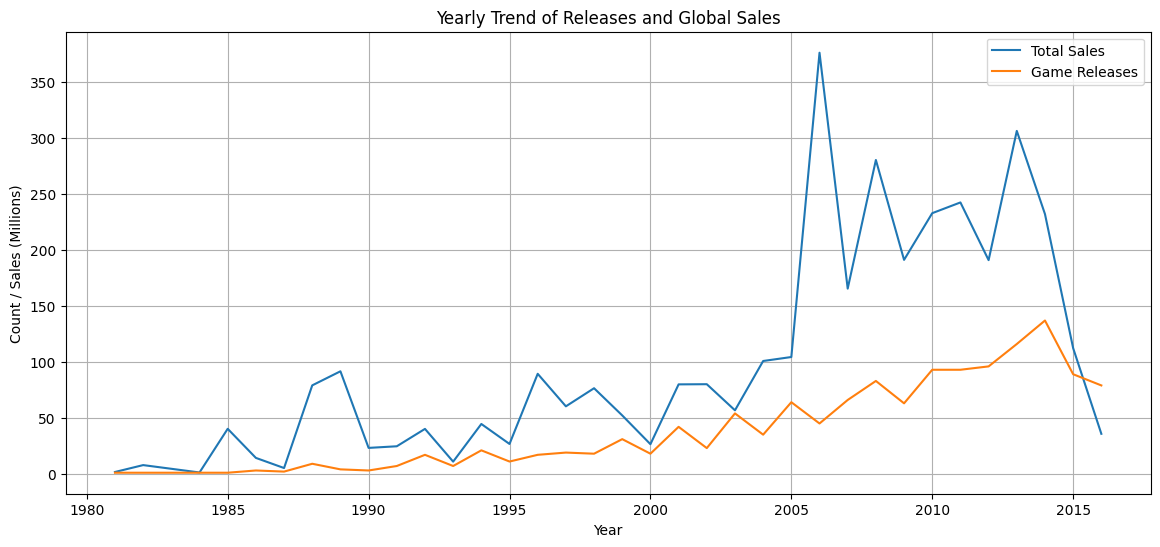

In [ ]:
#24.What’s the trend of releases and sales over time?

merged_df['Year'] = pd.to_numeric(merged_df['Year'], errors='coerce')

sales_by_year = merged_df.groupby('Year')['Global_Sales'].sum()
releases_by_year = merged_df['Year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, label='Total Sales')
sns.lineplot(x=releases_by_year.index, y=releases_by_year.values, label='Game Releases')
plt.title("Yearly Trend of Releases and Global Sales")
plt.xlabel("Year")
plt.ylabel("Count / Sales (Millions)")
plt.legend()
plt.grid(True)
plt.show()

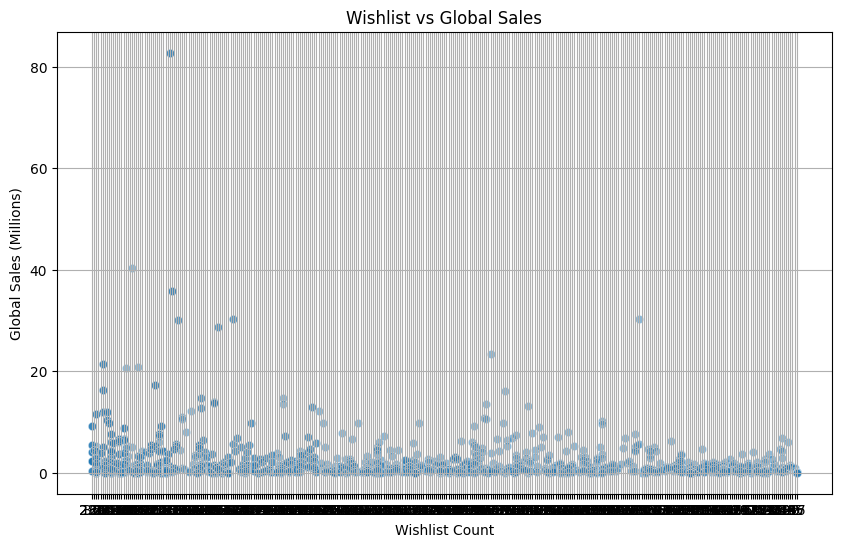

In [ ]:
#25.Do highly wishlisted games lead to more sales?

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Wishlist', y='Global_Sales', alpha=0.5)
plt.title("Wishlist vs Global Sales")
plt.xlabel("Wishlist Count")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.show()

In [ ]:
#26.Which genres have the highest engagement but lowest sales?


import pandas as pd

# Convert K/M suffix strings to integers
def convert_str_to_number(value):
    if isinstance(value, str):
        value = value.strip().upper().replace(',', '')
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif value.isdigit():
            return int(value)
        else:
            return pd.NA
    return value

# Apply conversion to Plays, Backlogs, Wishlist
for col in ['Plays', 'Backlogs', 'Wishlist']:
    merged_df[col] = merged_df[col].apply(convert_str_to_number)

# Drop rows with missing required data
merged_df.dropna(subset=['Plays', 'Backlogs', 'Wishlist', 'Genres', 'Global_Sales'], inplace=True)

# Calculate Engagement
merged_df['Engagement'] = merged_df[['Plays', 'Backlogs', 'Wishlist']].sum(axis=1)

# Explode Genres
engaged_genres = merged_df.copy()
engaged_genres['Genres'] = engaged_genres['Genres'].str.split(',')
engaged_genres = engaged_genres.explode('Genres')
engaged_genres['Genres'] = engaged_genres['Genres'].str.strip()

# Group by Genre and aggregate
genre_stats = engaged_genres.groupby('Genres').agg({
    'Engagement': 'mean',
    'Global_Sales': 'mean'
}).sort_values(by=['Engagement', 'Global_Sales'], ascending=[False, True])

# Show top 10 genres with high engagement but low sales
print("🎮 Genres with High Engagement but Low Sales:")
display(genre_stats.head(10))



🎮 Genres with High Engagement but Low Sales:


,Engagement,Global_Sales
Genres,,
'Simulator'],20458.868421,3.610789
['Indie',17811.000000,0.123333
'Puzzle',16720.789474,1.893158
'Sport'],14773.800000,16.781333
'RPG'],13025.039604,1.930693
'Shooter'],12984.628571,2.383071
'Real Time Strategy',12979.400000,0.570000
'Indie',12826.095238,0.131429
['Simulator',12790.800000,50.122000


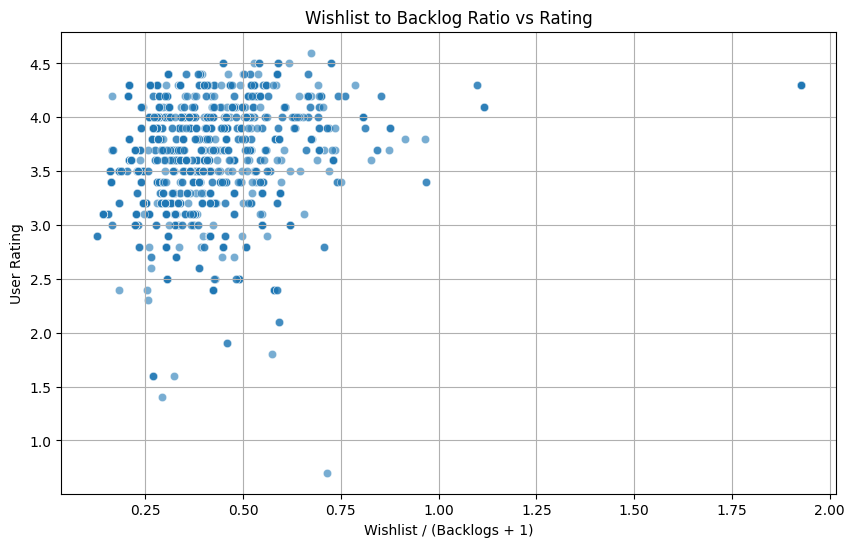

In [ ]:
#27. Do highly listed games (wishlist/backlogs) correlate with better ratings?

merged_df['WishBack_Ratio'] = merged_df['Wishlist'] / (merged_df['Backlogs'] + 1)

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='WishBack_Ratio', y='Rating', alpha=0.6)
plt.title("Wishlist to Backlog Ratio vs Rating")
plt.xlabel("Wishlist / (Backlogs + 1)")
plt.ylabel("User Rating")
plt.grid(True)
plt.show()

In [ ]:
#28.ow does user engagement differ across genres?


# Engagement already calculated
engaged_genres = merged_df.dropna(subset=['Genres', 'Engagement'])
engaged_genres['Genres'] = engaged_genres['Genres'].str.split(',')
engaged_genres = engaged_genres.explode('Genres')
engaged_genres['Genres'] = engaged_genres['Genres'].str.strip()

genre_engagement = engaged_genres.groupby('Genres')['Engagement'].mean().sort_values(ascending=False).head(10)
print("Average Engagement by Genre:")
display(genre_engagement)

Average Engagement by Genre:


,Engagement
Genres,
'Simulator'],20458.868421
['Indie',17811.000000
'Puzzle',16720.789474
'Sport'],14773.800000
'RPG'],13025.039604
'Shooter'],12984.628571
'Real Time Strategy',12979.400000
'Indie',12826.095238
['Simulator',12790.800000


In [ ]:
#29.What are the top-performing combinations of Genre + Platform?

# Clean and explode genre column
genre_platform_df = merged_df.dropna(subset=['Genres', 'Platform', 'Global_Sales'])
genre_platform_df['Genres'] = genre_platform_df['Genres'].str.split(',')
genre_platform_df = genre_platform_df.explode('Genres')
genre_platform_df['Genres'] = genre_platform_df['Genres'].str.strip()

# Group by Genre + Platform
combo_sales = genre_platform_df.groupby(['Genres', 'Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
print("Top Genre + Platform Combinations by Sales:")
display(combo_sales)

Top Genre + Platform Combinations by Sales:


Genres        Platform
['Adventure'  PS3         383.87
              X360        323.60
'Sport']      Wii         248.22
['Simulator'  Wii         248.22
'Shooter']    PS3         210.62
              X360        175.70
['Adventure'  Wii         165.86
['Shooter']   X360        163.37
['Adventure'  PS2         161.70
'Platform']   Wii         155.72
Name: Global_Sales, dtype: float64

In [ ]:
#30.Which platforms consistently receive higher user ratings?

platform_ratings = merged_df.groupby('Platform')['Rating'].mean().sort_values(ascending=False).dropna().head(10)
print("Top Platforms by Average User Rating:")
display(platform_ratings)

Top Platforms by Average User Rating:


,Rating
Platform,
SNES,3.941176
SAT,3.933333
GC,3.800000
DS,3.798077
N64,3.796667
PS,3.793443
PS2,3.781443
GB,3.764706
3DS,3.736842


In [ ]:
# Save your DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('merged_data.csv')  # This sends it to your local Downloads folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
games_df.to_csv('cleaned_games.csv', index=False)
vgsales_df.to_csv('cleaned_vgsales.csv', index=False)

from google.colab import files
files.download('cleaned_games.csv')
files.download('cleaned_vgsales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>